# Topic modeling on eu-timeline textual data

## Importing libraries

In [1]:
# import sys
# sys.path.append("/home/jovyan/work/sem-covid/")
# sys.path = list(set(sys.path))
#
# import os
# os.getcwd()
# os.chdir('/home/jovyan/work/sem-covid/')

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import spacy
nlp = spacy.load("en_core_web_sm")

import gensim
import pyLDAvis.gensim_models

from gensim.models import LdaModel, LsiModel
from sem_covid.entrypoints.notebooks.topic_modeling.topic_modeling_wrangling.topic_visualizer import generate_wordcloud
from sem_covid.services.data_registry import Dataset
from sem_covid.services.sc_wrangling.data_cleaning import clean_text_from_specific_characters, clean_fix_unicode, \
    clean_remove_currency_symbols, clean_remove_emails, clean_remove_urls
from sem_covid.entrypoints.notebooks.topic_modeling.topic_modeling_wrangling.token_management import filter_stop_words,\
    filter_pos, filter_stop_words_on_a_span_list, select_pos, spacy_stop_words

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=n

## Fetching data from document store

In [37]:
eu_timeline = Dataset.EU_ACTION_TIMELINE.fetch()

eu_timeline.fillna(value="", inplace=True)

document_corpus = eu_timeline['title'].map(str) + '. ' + \
                  eu_timeline['abstract'].map(str) + '. ' + \
                  eu_timeline['detail_title'].map(str) + '.' + \
                  eu_timeline['detail_content'].map(str)

_id
01dc34ca5f6bfa5316012d6f89a4256b8d2ce6e3a12210b0406903dd15bf36ac                                                  NaN
04eb55005a803c7353e5d5ed339d7f3a72cc8da6e49f2b8b152bf8fb40a1398f    \n\n\n\n\n\n\n\nToday, to help protect people ...
073e22ec2b44a5f2f6289f09dc954ecd6ca6cbb4a4b33ffd88c3c150572569c0    \n\n\n\n\n\n\n\nToday, the Commission, in coop...
0a3650bef3282d09d971dd92dc01570b7ecbdb67a4bdd0ff1c8cf8443a06b937                                                  NaN
0b2c998fcb1fca84b67271bf8ab2b32614258403935d01f51a880fbc68093dae                                                  NaN
                                                                                          ...                        
f6eee8efdb3ee5669d93597780e3338c9c30feef04ce17f1682aa9de0302b5fd    \n\n\n\n\n\n\n\nThe Commission announced today...
fa6c338fed7dd65c41fbe56ee08bbcf2b82fc6d144f099ba27ec134704d745d2    \n\n\n\n\n\n\n\nToday, the European Commission...
fb9c4d1634da94c73fd529b44ec40057c28a5c925a8b8e71d73c

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Data preprocessing

- data cleanup
- turn corpus into spacy Docs

In [36]:
unused_characters = ["\\r", ">", "\n", "\\", "<", "''", "%", "...", "\'", '"', "(", "\n", "*", "1)", "2)", "3)",
                     "[", "]", "-", "_", "\r"]

document_corpus = document_corpus.apply(clean_text_from_specific_characters, characters=unused_characters)
document_corpus = document_corpus.apply(clean_fix_unicode)
document_corpus = document_corpus.apply(clean_remove_urls)
document_corpus = document_corpus.apply(clean_remove_emails)
document_corpus = document_corpus.apply(clean_remove_currency_symbols)
spacy_corpus = document_corpus.apply(nlp)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Preparing few corpora

Filter document tokens. Select only the needed/interesting tokens for Topic modeling:
   - all words
   - nouns
   - verbs
   - noun phrases

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



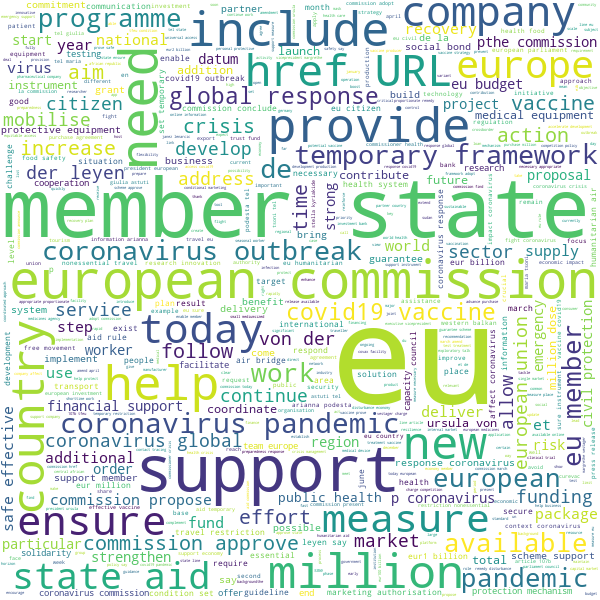

In [4]:
word_corpus = spacy_corpus.apply(filter_stop_words, stop_words=spacy_stop_words)
word_corpus = word_corpus.apply(filter_pos, pos="PUNCT")
word_corpus = word_corpus.apply(lambda x: list(map(lambda docs: docs.lemma_,x)))

generate_wordcloud(" ".join( [" ".join(doc) for doc in word_corpus]) )

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



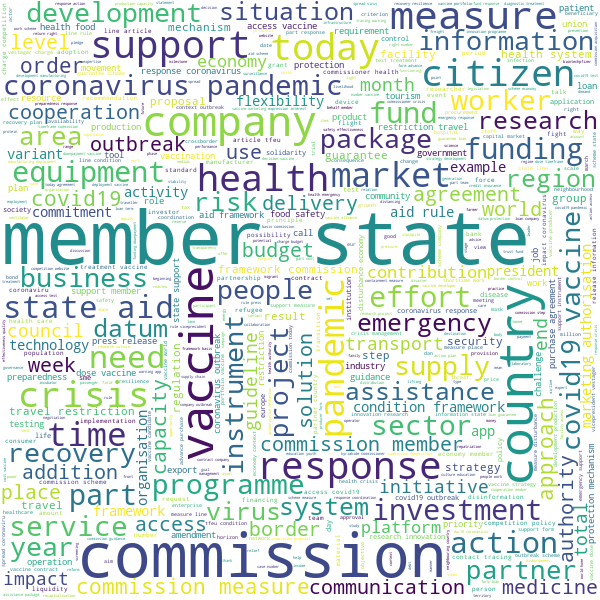

In [5]:
noun_corpus = spacy_corpus.apply(select_pos, pos="NOUN")
noun_corpus = noun_corpus.apply(lambda x: list(map(lambda docs: docs.lemma_,x)))

generate_wordcloud(" ".join( [" ".join(doc) for doc in noun_corpus]) )

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



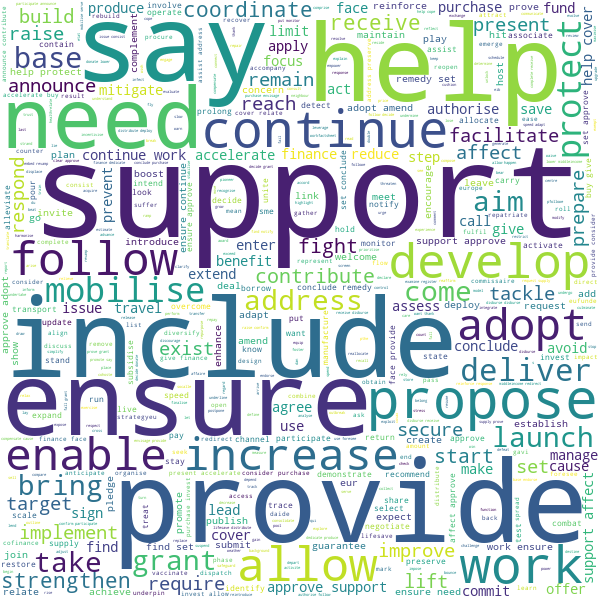

In [6]:
verb_corpus = spacy_corpus.apply(select_pos, pos="VERB")
verb_corpus = verb_corpus.apply(filter_stop_words)
verb_corpus = verb_corpus.apply(lambda x: list(map(lambda docs: docs.lemma_,x)))

generate_wordcloud(" ".join( [" ".join(doc) for doc in verb_corpus]) )

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



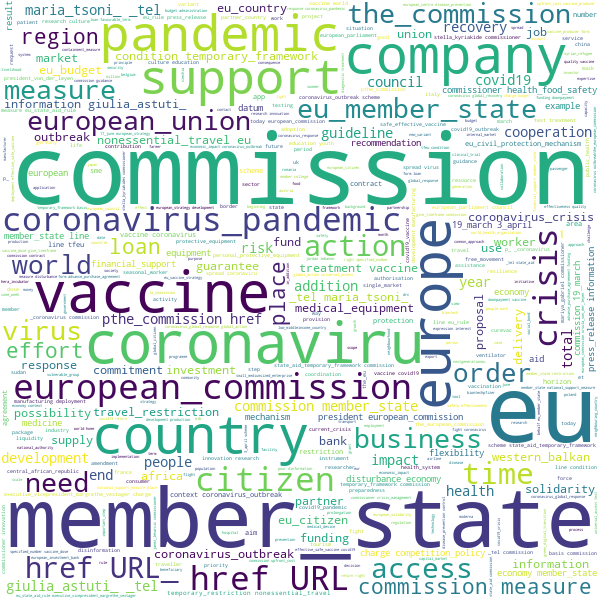

In [7]:
noun_phrase_corpus = spacy_corpus.apply(lambda x: x.noun_chunks)
noun_phrase_corpus = noun_phrase_corpus.apply(filter_stop_words_on_a_span_list)

generate_wordcloud(" ".join( [" ".join(doc) for doc in noun_phrase_corpus]) )

## Train LDA + LSI models

- create_dag a dictionary and a corpus with each corpora
- train LDA models
- train LSI models
- visualize the results (LDA)

In [8]:
word_dictionary = gensim.corpora.Dictionary(word_corpus)
noun_dictionary = gensim.corpora.Dictionary(noun_corpus)
verb_dictionary = gensim.corpora.Dictionary(verb_corpus)
noun_phrases_dictionary = gensim.corpora.Dictionary(noun_phrase_corpus)

word_gensim_corpus = [word_dictionary.doc2bow(docs) for docs in word_corpus]
noun_gensim_corpus = [noun_dictionary.doc2bow(docs) for docs in noun_corpus]
verb_gensim_corpus = [verb_dictionary.doc2bow(docs) for docs in verb_corpus]
noun_phrases_gensim_corpus = [noun_phrases_dictionary.doc2bow(docs) for docs in noun_phrase_corpus]

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [9]:
word_lda_model = LdaModel(corpus=word_gensim_corpus, num_topics=5, id2word=word_dictionary, chunksize=30, random_state=40)
noun_lda_model = LdaModel(corpus=noun_gensim_corpus, num_topics=5, id2word=noun_dictionary, chunksize=30, random_state=40)
verb_lda_model = LdaModel(corpus=verb_gensim_corpus, num_topics=4, id2word=verb_dictionary, chunksize=20, random_state=40)
noun_phrases_lda_model = LdaModel(corpus=noun_phrases_gensim_corpus, num_topics=5, id2word=noun_phrases_dictionary, chunksize=30, random_state=40)

word_lsa_model = LsiModel(corpus=word_gensim_corpus, num_topics=6, id2word=word_dictionary, chunksize=300)
noun_lsa_model = LsiModel(corpus=noun_gensim_corpus, num_topics=6, id2word=noun_dictionary, chunksize=300)
verb_lsa_model = LsiModel(corpus=verb_gensim_corpus, num_topics=6, id2word=verb_dictionary, chunksize=300)
noun_phrases_lsa_model = LsiModel(corpus=noun_phrases_gensim_corpus, num_topics=6, id2word=noun_phrases_dictionary, chunksize=300)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [10]:
pyLDAvis.enable_notebook()
word_visualization = pyLDAvis.gensim_models.prepare(word_lda_model, word_gensim_corpus, word_dictionary)
word_visualization

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.050055 -0.010987       1        1  27.021555
4      0.125687 -0.088825       2        1  25.113881
2     -0.158409 -0.021845       3        1  16.813859
3      0.044632  0.148150       4        1  16.326441
0     -0.061964 -0.026493       5        1  14.724264, topic_info=              Term        Freq       Total Category  logprob  loglift
353        vaccine  821.000000  821.000000  Default  30.0000  30.0000
1972            de  350.000000  350.000000  Default  29.0000  29.0000
2035            la  217.000000  217.000000  Default  28.0000  28.0000
1299  humanitarian  192.000000  192.000000  Default  27.0000  27.0000
1823          sure  198.000000  198.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
12        european   93.246289  894.933932   Topic5  -4.9336  -0.3458
483         impact   51.371809  162.968491   Topic5  -5.5297   0.7612
230           need   65.784004  438.863837   Topic5  -5.2824   0.0179
94         covid19   58.425842  455.762719   Topic5  -5.4011  -0.1385
269        provide   55.405267  327.917918   Topic5  -5.4541   0.1376

[391 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1899      1  0.011452    +32
1899      2  0.005726    +32
1899      3  0.927605    +32
1899      4  0.005726    +32
1899      5  0.057260    +32
...     ...       ...    ...
362       1  0.191901  world
362       2  0.594893  world
362       3  0.051174  world
362       4  0.140727  world
362       5  0.012793  world

[983 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 4, 1])

In [11]:
noun_visualization = pyLDAvis.gensim_models.prepare(noun_lda_model, noun_gensim_corpus, noun_dictionary)
noun_visualization

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.038391 -0.049073       1        1  27.660766
3      0.119745  0.163420       2        1  24.815065
4      0.022287 -0.067275       3        1  22.720626
2      0.025511 -0.111815       4        1  19.511598
1     -0.205933  0.064743       5        1   5.291944, topic_info=           Term         Freq        Total Category  logprob  loglift
168     vaccine   777.000000   777.000000  Default  30.0000  30.0000
149       state  1001.000000  1001.000000  Default  29.0000  29.0000
249     measure   440.000000   440.000000  Default  28.0000  28.0000
564         aid   271.000000   271.000000  Default  27.0000  27.0000
94       member   870.000000   870.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
76       health    15.154542   435.873593   Topic5  -4.9178  -0.4201
158     testing    11.420921   118.289327   Topic5  -5.2007   0.6013
36      citizen    12.107827   193.199286   Topic5  -5.1423   0.1691
37   commission    14.756658   917.796697   Topic5  -4.9444  -1.1913
94       member    11.116907   870.702658   Topic5  -5.2277  -1.4218

[358 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.322140      >
0         2  0.346002      >
0         3  0.196863      >
0         4  0.119311      >
0         5  0.017897      >
...     ...       ...    ...
724       1  0.030295  youth
724       2  0.060590  youth
724       3  0.848265  youth
724       4  0.030295  youth
724       5  0.030295  youth

[853 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 3, 2])

In [12]:
verb_visualization = pyLDAvis.gensim_models.prepare(verb_lda_model, verb_gensim_corpus, verb_dictionary)
verb_visualization

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.154923  0.046608       1        1  28.012941
2     -0.015589 -0.076631       2        1  26.677494
1     -0.034582 -0.075105       3        1  25.706981
3     -0.104752  0.105128       4        1  19.602584, topic_info=         Term        Freq       Total Category  logprob  loglift
50   mobilise  121.000000  121.000000  Default  30.0000  30.0000
62    receive  105.000000  105.000000  Default  29.0000  29.0000
143       set  159.000000  159.000000  Default  28.0000  28.0000
60   purchase   50.000000   50.000000  Default  27.0000  27.0000
70     secure   61.000000   61.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
28       face   26.377561   81.705385   Topic4  -4.6885   0.4989
223  announce   24.360052   72.689800   Topic4  -4.7681   0.5363
32     follow   25.972648  110.092255   Topic4  -4.7040   0.1852
38    include   29.808559  303.336086   Topic4  -4.5663  -0.6905
61      raise   22.910462   57.600269   Topic4  -4.8295   0.7076

[272 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
5         1  0.064830  accelerate
5         2  0.226904  accelerate
5         3  0.016207  accelerate
5         4  0.696919  accelerate
80        2  0.238452     acquire
...     ...       ...         ...
184       2  0.868169     welcome
77        1  0.229245        work
77        2  0.308982        work
77        3  0.244195        work
77        4  0.214294        work

[522 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

In [13]:
noun_phrases_visualization = pyLDAvis.gensim_models.prepare(noun_phrases_lda_model, noun_phrases_gensim_corpus, noun_phrases_dictionary)
noun_phrases_visualization


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.082751  0.120692       1        1  30.148673
3      0.131591  0.038122       2        1  21.016003
2     -0.013111 -0.114607       3        1  19.938786
1     -0.088063 -0.041181       4        1  16.473165
0      0.052334 -0.003026       5        1  12.423373, topic_info=              Term        Freq       Total Category  logprob  loglift
214        vaccine  262.000000  262.000000  Default  30.0000  30.0000
150   member_state  554.000000  554.000000  Default  29.0000  29.0000
1673           +32   71.000000   71.000000  Default  28.0000  28.0000
2214      research   76.000000   76.000000  Default  27.0000  27.0000
209      treatment   98.000000   98.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
105        funding   10.412799   63.949632   Topic5  -6.0598   0.2705
39    commissioner   11.052984   93.441971   Topic5  -6.0001  -0.0490
262         crisis   10.237707   90.910183   Topic5  -6.0767  -0.0982
150   member_state   10.510173  554.358529   Topic5  -6.0504  -1.8799
213            use    9.092007   53.316345   Topic5  -6.1954   0.3167

[344 rows x 6 columns], token_table=      Topic      Freq                       Term
term                                            
6442      5  0.855617     '_team_europe_approach
1673      1  0.014082                        +32
1673      3  0.957573                        +32
1673      4  0.014082                        +32
1673      5  0.014082                        +32
...     ...       ...                        ...
3536      4  0.156374  world_health_organization
3536      5  0.547310  world_health_organization
5207      5  0.904605                      yemen
1390      3  0.955482                      youth
1390      4  0.036749                      youth

[652 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 2, 1])